In [1]:
# NEW new normalizations
# NOT normalizing the inputs
# normalizing outputs
# no more train test split
# tanh activation
# sigmoid on ALL outputs

# Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import lalsimulation as lal
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
import keras
import keras_metrics as km
import keras
import keras_metrics as km
from keras import metrics

2023-09-26 13:34:41.157972: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
gamma0_real = np.loadtxt("test_gamma_0.dat", dtype=float)
gamma1_real = np.loadtxt("test_gamma_1.dat", dtype=float)
gamma2_real = np.loadtxt("test_gamma_2.dat", dtype=float)
l1_real = np.loadtxt('test_lambda_1.dat', dtype=float)
l2_real = np.loadtxt('test_lambda_2.dat', dtype=float)
logp1_cgs = np.loadtxt("test_logp1_cgs.dat", dtype=float)
logp2_cgs = np.loadtxt("test_logp2_cgs.dat", dtype=float)
m1_real = np.loadtxt("test_mass_1.dat", dtype=float)
m2_real = np.loadtxt("test_mass_2.dat", dtype=float)

In [9]:
len(m2_real)

541

In [10]:
m1_dat = m1_real
m2_dat = m2_real
l1_dat = l1_real
l2_dat = l2_real

In [11]:
.8 * 541

432.8

# Functions

In [12]:
#formatting array & processing outputs

def format_output(data):
    gamma0 = data.pop('gamma0')
    gamma0 = np.array(gamma0)
    gamma1 = data.pop('gamma1')
    gamma1 = np.array(gamma1)
    gamma2 = data.pop('gamma2')
    gamma2 = np.array(gamma2)
    logp1_si = data.pop('logp1_si')
    logp1_si = np.array(logp1_si)
    logp2_si = data.pop('logp2_si')
    logp2_si = np.array(logp2_si)
    return gamma0, gamma1, gamma2, logp1_si, logp2_si



In [13]:
#return inputs back to original values in order to plot EOS

# log(p1) & p2 ∈ [33, 37], in cgs
# Γ0, Γ1, Γ2 ∈ [1.0, 5.0]


def unnorm(predictionsarray):
    
    for i in range (len(predictionsarray)):
        new_gamma0_array = predictionsarray[0] * (5 - 1) + 1
        new_gamma1_array = predictionsarray[1] * (5 - 1) + 1
        new_gamma2_array = predictionsarray[2] * (5 - 1) + 1
        
        cgs_logp1 = predictionsarray[3] + 1
        cgs_logp2 = predictionsarray[4] + 1
        
        cgs_logp1_unnorm = cgs_logp1 * (37 - 33) + 33
        cgs_logp2_unnorm = cgs_logp2 * (37 - 33) + 33
        
        new_logp1_array = cgs_logp1_unnorm - 1
        new_logp2_array = cgs_logp2_unnorm - 1
    
    new_array = np.concatenate((new_gamma0_array, new_gamma1_array, new_gamma2_array, new_logp1_array, new_logp2_array), axis=1)

    return new_array




# MLA

In [17]:

# log(p1) & p2 ∈ [33, 37], in cgs
# Γ0, Γ1, Γ2 ∈ [1.0, 5.0]


logp1_s_norm = ((logp1_cgs - 1) - (33-1))/((37-1) - (33-1))
logp2_s_norm = ((logp2_cgs - 1) - (33-1))/((37-1) - (33-1))

logp1_si = logp1_s_norm
logp2_si = logp2_s_norm


sd_gamma0 = (gamma0_real - 1)/(5 - 1)
sd_gamma1 = (gamma1_real - 1)/(5 - 1)
sd_gamma2 = (gamma2_real - 1)/(5 - 1)


un-normalized outputs

1.2794975575618972
4.994009023889495


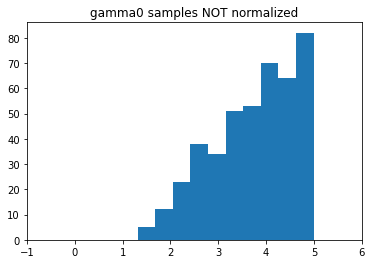

1.0004706315315508
4.999271487105766


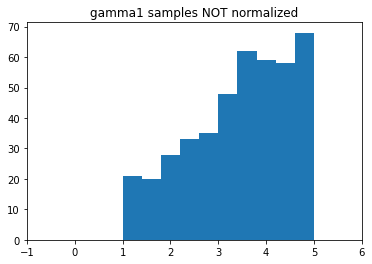

1.000231270745974
2.957224084475217


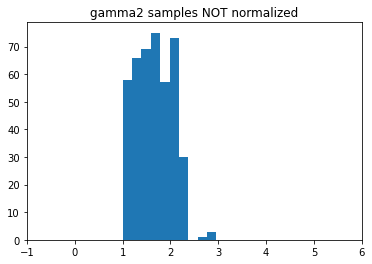

0.0012066484461676907
0.960923412585478


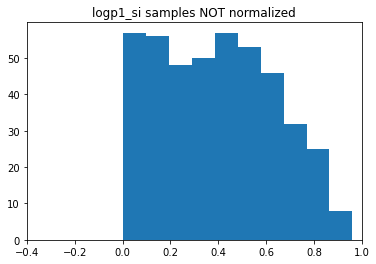

0.056537653575921
0.9995282578078619


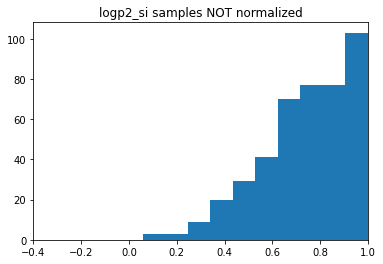

In [20]:
plt.hist(gamma0_real[0:432])
plt.title("gamma0 samples NOT normalized")
print(np.min(gamma0_real))
print(np.max(gamma0_real))
plt.xlim(-1, 6)
plt.show()

plt.hist(gamma1_real[0:432])
plt.title("gamma1 samples NOT normalized")
print(np.min(gamma1_real))
print(np.max(gamma1_real))
plt.xlim(-1, 6)
plt.show()

plt.hist(gamma2_real[0:432])
plt.title("gamma2 samples NOT normalized")
print(np.min(gamma2_real))
print(np.max(gamma2_real))
plt.xlim(-1, 6)
plt.show()

plt.hist(logp1_s_norm[0:432])
plt.title("logp1_si samples NOT normalized")
print(np.min(logp1_si))
print(np.max(logp1_si))
plt.xlim(-.4, 1)
plt.show()

plt.hist(logp2_s_norm[0:432])
plt.title("logp2_si samples NOT normalized")
print(np.min(logp2_si))
print(np.max(logp2_si))
plt.xlim(-.4, 1)
plt.show()

normalized outputs

0.0698743893904743
0.9985022559723737


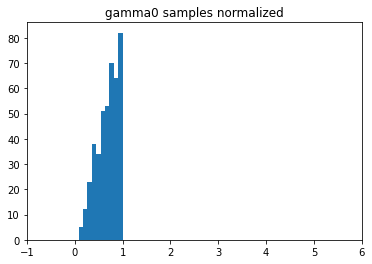

0.00011765788288770063
0.9998178717764414


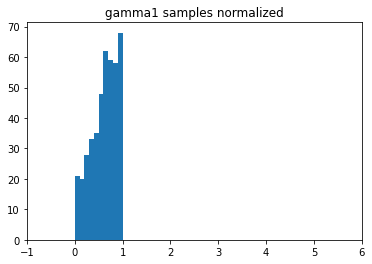

5.781768649348873e-05
0.4893060211188043


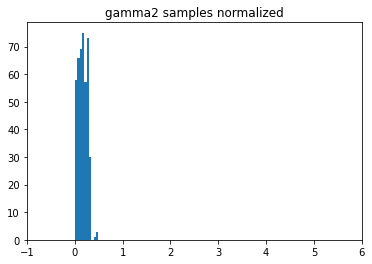

0.0012066484461676907
0.960923412585478


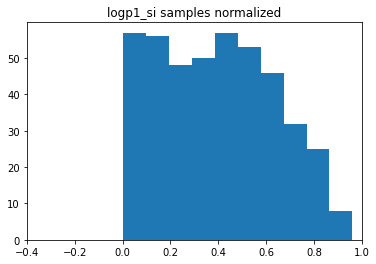

0.056537653575921
0.9995282578078619


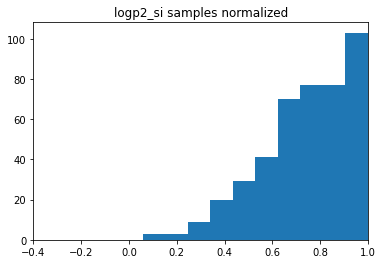

In [21]:
plt.hist(sd_gamma0[0:432])
plt.title("gamma0 samples normalized")
print(np.min(sd_gamma0))
print(np.max(sd_gamma0))
plt.xlim(-1, 6)
plt.show()

plt.hist(sd_gamma1[0:432])
plt.title("gamma1 samples normalized")
print(np.min(sd_gamma1))
print(np.max(sd_gamma1))
plt.xlim(-1, 6)
plt.show()

plt.hist(sd_gamma2[0:432])
plt.title("gamma2 samples normalized")
print(np.min(sd_gamma2))
print(np.max(sd_gamma2))
plt.xlim(-1, 6)
plt.show()

plt.hist(logp1_si[0:432])
plt.title("logp1_si samples normalized")
print(np.min(logp1_si))
print(np.max(logp1_si))
plt.xlim(-.4, 1)
plt.show()

plt.hist(logp2_si[0:432])
plt.title("logp2_si samples normalized")
print(np.min(logp2_si))
print(np.max(logp2_si))
plt.xlim(-.4, 1)
plt.show()

In [22]:
#create an empty array 8 x length(m1_dat]) for vals
array_size =  np.array([[0] * 9 ] * len(sd_gamma0))
array_size = array_size.astype('float64')
combined_array = np.zeros_like(array_size)
print(combined_array.dtype)
print(combined_array.shape)

float64
(541, 9)


In [23]:
#reformat data files into this new array
for i in range(0,len(m1_dat)-1):
    combined_array[i][0] = m1_dat[i]
    combined_array[i][1] = m2_dat[i]
    combined_array[i][2] = l1_dat[i]
    combined_array[i][3] = l2_dat[i]
    combined_array[i][4] = sd_gamma0[i]
    combined_array[i][5] = sd_gamma1[i]
    combined_array[i][6] = sd_gamma2[i]
    combined_array[i][7] = logp1_si[i]
    combined_array[i][8] = logp2_si[i]
    

In [24]:
data = pd.DataFrame(combined_array)
data.columns = ['m1','m2', 'l1', 'l2','gamma0', 'gamma1', 'gamma2', 'logp1_si', 'logp2_si']
print(data)

           m1        m2            l1            l2    gamma0    gamma1  \
0    0.917844  0.664838  10309.423198  45454.839034  0.648856  0.745487   
1    2.535693  2.119748     21.983584     93.433939  0.630087  0.988135   
2    0.876440  0.544662   6285.673678  66908.231217  0.479282  0.037464   
3    4.197769  2.922266      2.104015     56.536123  0.997567  0.735291   
4    2.489261  1.330280     98.981223   3012.682289  0.875637  0.550842   
..        ...       ...           ...           ...       ...       ...   
536  2.170350  1.992358    135.542559    230.419913  0.716868  0.919516   
537  0.960622  0.662081     26.347301    391.555249  0.153341  0.610729   
538  0.974471  0.579292   4764.888085  54822.247158  0.497121  0.784112   
539  1.733165  1.563308    691.756899   1181.733758  0.816467  0.800277   
540  0.000000  0.000000      0.000000      0.000000  0.000000  0.000000   

       gamma2  logp1_si  logp2_si  
0    0.148472  0.413552  0.498441  
1    0.068198  0.599191  0.

In [25]:
# 541 total samples: 80% = 432, 20% = 108.2
# for train and test ONLY:
# we want the first 432 samples to = train
# we want the last 109 samples to = test
# split row-wise, not collumn-wise

# splitting dataframe by row index
train = data.iloc[:432,:]
test = data.iloc[432:,:]
print("Shape of new dataframes - {} , {}".format(train.shape, test.shape))

train_stats = train.describe()

train_stats.pop('gamma0')
train_stats.pop('gamma1')
train_stats.pop('gamma2')
train_stats.pop('logp1_si')
train_stats.pop('logp2_si')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)


Shape of new dataframes - (432, 9) , (109, 9)


In [26]:
#split data into train and test

data = data.sample(frac=1).reset_index(drop=True)

train, test = train_test_split(data, test_size=0.2)

print(train)

train_stats = train.describe()

#get gamma as the outputs and format them as np arrays.

train_stats.pop('gamma0')
train_stats.pop('gamma1')
train_stats.pop('gamma2')
train_stats.pop('logp1_si')
train_stats.pop('logp2_si')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

           m1        m2            l1            l2    gamma0    gamma1  \
317  3.221245  1.699551     15.896929    871.619171  0.859257  0.803288   
173  0.570630  0.521026  36708.068176  61399.968664  0.951489  0.305099   
460  0.994460  0.587493   4915.615350  64817.405872  0.570225  0.151437   
28   1.197433  0.853386   1639.273870   9613.780816  0.533277  0.491289   
476  1.679938  0.677796    872.304228  56467.511031  0.741183  0.869272   
..        ...       ...           ...           ...       ...       ...   
60   2.533856  1.451216     95.227919   1966.710634  0.871084  0.188133   
371  1.388470  0.888478    264.134846   4281.282072  0.436212  0.788920   
8    2.067885  1.561489     61.887637    423.462521  0.561656  0.780490   
119  2.455547  1.245796     47.133818   3428.909026  0.786030  0.828771   
68   0.864887  0.592075   9935.013561  61722.191518  0.738723  0.517908   

       gamma2  logp1_si  logp2_si  
317  0.221265  0.899722  0.952789  
173  0.026573  0.024721  0.

In [27]:
norm_train_X = train
norm_test_X = test

In [28]:
input_layer = Input(shape=(len(train .columns),))

layeract = 'tanh'
#^ try linear
#  try relu
#   
#
outputact = 'signmoid'
#gammas output -> sigmoid

first_dense = Dense(units='128', activation=layeract)(input_layer)
second_dense = Dense(units='128', activation=layeract)(first_dense)
third_dense = Dense(units='128', activation='tanh')(second_dense)
fourth_dense = Dense(units='128', activation='tanh')(third_dense)
fifth_dense = Dense(units='128', activation='tanh')(fourth_dense)
sixth_dense = Dense(units='128', activation='tanh')(fifth_dense)
seventh_dense = Dense(units='128', activation='tanh')(sixth_dense)
eight_dense = Dense(units='128', activation='tanh')(seventh_dense)
ninth_dense = Dense(units='128', activation='tanh')(eight_dense)
    
tenth_dense = Dense(units='128', activation='tanh')(ninth_dense)
eleventh_dense = Dense(units='128', activation='tanh')(tenth_dense)
twelth_dense = Dense(units='128', activation='tanh')(eleventh_dense)
thirteenth_dense = Dense(units='128', activation='tanh')(twelth_dense)
fourteenth_dense = Dense(units='128', activation='tanh')(thirteenth_dense)
fifteenth_dense = Dense(units='128', activation='tanh')(fourteenth_dense)
sixteenth_dense = Dense(units='128', activation='tanh')(fifteenth_dense)
seventeenth_dense = Dense(units='128', activation='tanh')(sixteenth_dense)
eighteenth_dense = Dense(units='128', activation='tanh')(seventeenth_dense)
nineteenth_dense = Dense(units='128', activation='tanh')(eighteenth_dense)
    
twentieth_dense = Dense(units='128', activation='tanh')(nineteenth_dense)
tf_dense = Dense(units='128', activation='tanh')(twentieth_dense)
ts_dense = Dense(units='128', activation='tanh')(tf_dense)
tt_dense = Dense(units='128', activation='tanh')(ts_dense)
tfo_dense = Dense(units='128', activation='tanh')(tt_dense)
tfi_dense = Dense(units='128', activation='tanh')(tfo_dense)
ts_dense = Dense(units='128', activation='tanh')(tfi_dense)
tse_dense = Dense(units='128', activation='tanh')(ts_dense)
te_dense = Dense(units='128', activation='tanh')(tse_dense)
tn_dense = Dense(units='128', activation='tanh')(te_dense)


gamma0_output = Dense(units='1', activation='sigmoid', name='gamma0_output')(tn_dense)
thf_dense = Dense(units='64', activation='tanh')(tn_dense)

ths_dense = Dense(units='128', activation='tanh')(thf_dense)
tht_dense = Dense(units='128', activation='tanh')(ths_dense)
thfo_dense = Dense(units='128', activation='tanh')(tht_dense)
thfi_dense = Dense(units='128', activation='tanh')(thfo_dense)
ths_dense = Dense(units='128', activation='tanh')(thfi_dense)
thse_dense = Dense(units='128', activation='tanh')(ths_dense)
the_dense = Dense(units='128', activation='tanh')(thse_dense)
thn_dense = Dense(units='128', activation='tanh')(the_dense)

gamma1_output = Dense(units='1', activation='sigmoid', name='gamma1_output')(thn_dense)
fo_dense = Dense(units='32',activation='tanh')(thn_dense)

fof_dense = Dense(units='128', activation='tanh')(fo_dense)
fos_dense = Dense(units='128', activation='tanh')(fof_dense)
fot_dense = Dense(units='128', activation='tanh')(fos_dense)
fofo_dense = Dense(units='128', activation='tanh')(fot_dense)
fofi_dense = Dense(units='128', activation='tanh')(fofo_dense)

gamma2_output = Dense(units='1', activation='sigmoid', name='gamma2_output')(fofi_dense)
fos_dense = Dense(units='16',activation='tanh')(fofi_dense)

fose_dense = Dense(units='128', activation='tanh')(fos_dense)
foe_dense = Dense(units='128', activation='tanh')(fose_dense)
fon_dense = Dense(units='128', activation='tanh')(foe_dense)
fif_dense = Dense(units='128', activation='tanh')(fon_dense)

logp1_si_output = Dense(units='1', activation='sigmoid', name='logp1_si_output')(fon_dense)

fiff_dense = Dense(units='128', activation='tanh')(fon_dense)
fifs_dense = Dense(units='128', activation='tanh')(fiff_dense)
fift_dense = Dense(units='128', activation='tanh')(fifs_dense)
fiff_dense = Dense(units='128', activation='tanh')(fift_dense)
fiffi_dense = Dense(units='128', activation='tanh')(fiff_dense)
fifs_dense = Dense(units='128', activation='tanh')(fiffi_dense)

logp2_si_output = Dense(units='1', activation='sigmoid', name='logp2_si_output')(fifs_dense)


model = Model(inputs=input_layer, outputs=[gamma0_output, gamma1_output, gamma2_output, logp1_si_output, logp2_si_output])

print(model.summary())

2023-09-26 13:49:50.976510: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          640         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 128)          16512       ['dense_1[0][0]']                
                                                                                              

 dense_39 (Dense)               (None, 128)          4224        ['dense_38[0][0]']               
                                                                                                  
 dense_40 (Dense)               (None, 128)          16512       ['dense_39[0][0]']               
                                                                                                  
 dense_41 (Dense)               (None, 128)          16512       ['dense_40[0][0]']               
                                                                                                  
 dense_42 (Dense)               (None, 128)          16512       ['dense_41[0][0]']               
                                                                                                  
 dense_43 (Dense)               (None, 128)          16512       ['dense_42[0][0]']               
                                                                                                  
 dense_44 

In [45]:
#plot_model(model, to_file='DynamicPolytropeMLA.png', show_shapes=True, show_layer_names=True)

In [46]:
#specify the optimizer as stochastic gradient descent and will mention the learning rate as 0.001
#compile the model with loss functions for both outputs
from keras import metrics

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss={'gamma0_output': 'mse', 'gamma1_output': 'mse', 'gamma2_output': 'mse', 'logp1_si_output': 'mse', 'logp2_si_output': 'mse'},
              metrics={
                       'gamma0_output': tf.keras.metrics.MeanSquaredError() ,
                       'gamma1_output': tf.keras.metrics.MeanSquaredError(),
                       'gamma2_output': tf.keras.metrics.MeanSquaredError() ,
                       'logp1_si_output': tf.keras.metrics.MeanSquaredError(),
                       'logp2_si_output': tf.keras.metrics.MeanSquaredError()
                      })

endmetric = "mean_squared_error"

In [47]:
#train the model for a number of epochs

numepochs = 200
    
history = model.fit(norm_train_X.to_numpy(), train_Y,
                    epochs=numepochs, batch_size=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=50,mode='auto')])


Epoch 1/200
35/35 [==============================] - 5s 34ms/step - loss: 0.2549 - gamma0_output_loss: 0.0526 - gamma1_output_loss: 0.0789 - gamma2_output_loss: 0.0172 - logp1_si_output_loss: 0.0643 - logp2_si_output_loss: 0.0419 - gamma0_output_mean_squared_error: 0.0526 - gamma1_output_mean_squared_error: 0.0789 - gamma2_output_mean_squared_error: 0.0172 - logp1_si_output_mean_squared_error: 0.0643 - logp2_si_output_mean_squared_error: 0.0419 - val_loss: 0.2001 - val_gamma0_output_loss: 0.0456 - val_gamma1_output_loss: 0.0610 - val_gamma2_output_loss: 0.0088 - val_logp1_si_output_loss: 0.0535 - val_logp2_si_output_loss: 0.0311 - val_gamma0_output_mean_squared_error: 0.0456 - val_gamma1_output_mean_squared_error: 0.0610 - val_gamma2_output_mean_squared_error: 0.0088 - val_logp1_si_output_mean_squared_error: 0.0535 - val_logp2_si_output_mean_squared_error: 0.0311
Epoch 2/200
35/35 [==============================] - 0s 14ms/step - loss: 0.2368 - gamma0_output_loss: 0.0482 - gamma1_outpu

35/35 [==============================] - 1s 16ms/step - loss: 0.2314 - gamma0_output_loss: 0.0466 - gamma1_output_loss: 0.0767 - gamma2_output_loss: 0.0096 - logp1_si_output_loss: 0.0592 - logp2_si_output_loss: 0.0393 - gamma0_output_mean_squared_error: 0.0466 - gamma1_output_mean_squared_error: 0.0767 - gamma2_output_mean_squared_error: 0.0096 - logp1_si_output_mean_squared_error: 0.0592 - logp2_si_output_mean_squared_error: 0.0393 - val_loss: 0.1913 - val_gamma0_output_loss: 0.0448 - val_gamma1_output_loss: 0.0527 - val_gamma2_output_loss: 0.0093 - val_logp1_si_output_loss: 0.0532 - val_logp2_si_output_loss: 0.0313 - val_gamma0_output_mean_squared_error: 0.0448 - val_gamma1_output_mean_squared_error: 0.0527 - val_gamma2_output_mean_squared_error: 0.0093 - val_logp1_si_output_mean_squared_error: 0.0532 - val_logp2_si_output_mean_squared_error: 0.0313
Epoch 20/200
35/35 [==============================] - 0s 13ms/step - loss: 0.2310 - gamma0_output_loss: 0.0467 - gamma1_output_loss: 0.0

35/35 [==============================] - 1s 18ms/step - loss: 0.2282 - gamma0_output_loss: 0.0460 - gamma1_output_loss: 0.0757 - gamma2_output_loss: 0.0092 - logp1_si_output_loss: 0.0590 - logp2_si_output_loss: 0.0383 - gamma0_output_mean_squared_error: 0.0460 - gamma1_output_mean_squared_error: 0.0757 - gamma2_output_mean_squared_error: 0.0092 - logp1_si_output_mean_squared_error: 0.0590 - logp2_si_output_mean_squared_error: 0.0383 - val_loss: 0.1945 - val_gamma0_output_loss: 0.0449 - val_gamma1_output_loss: 0.0555 - val_gamma2_output_loss: 0.0092 - val_logp1_si_output_loss: 0.0527 - val_logp2_si_output_loss: 0.0323 - val_gamma0_output_mean_squared_error: 0.0449 - val_gamma1_output_mean_squared_error: 0.0555 - val_gamma2_output_mean_squared_error: 0.0092 - val_logp1_si_output_mean_squared_error: 0.0527 - val_logp2_si_output_mean_squared_error: 0.0323
Epoch 38/200
35/35 [==============================] - 1s 18ms/step - loss: 0.2278 - gamma0_output_loss: 0.0458 - gamma1_output_loss: 0.0

35/35 [==============================] - 1s 17ms/step - loss: 0.2251 - gamma0_output_loss: 0.0455 - gamma1_output_loss: 0.0743 - gamma2_output_loss: 0.0093 - logp1_si_output_loss: 0.0583 - logp2_si_output_loss: 0.0379 - gamma0_output_mean_squared_error: 0.0455 - gamma1_output_mean_squared_error: 0.0743 - gamma2_output_mean_squared_error: 0.0093 - logp1_si_output_mean_squared_error: 0.0583 - logp2_si_output_mean_squared_error: 0.0379 - val_loss: 0.2039 - val_gamma0_output_loss: 0.0531 - val_gamma1_output_loss: 0.0544 - val_gamma2_output_loss: 0.0099 - val_logp1_si_output_loss: 0.0527 - val_logp2_si_output_loss: 0.0337 - val_gamma0_output_mean_squared_error: 0.0531 - val_gamma1_output_mean_squared_error: 0.0544 - val_gamma2_output_mean_squared_error: 0.0099 - val_logp1_si_output_mean_squared_error: 0.0527 - val_logp2_si_output_mean_squared_error: 0.0337
Epoch 56/200
35/35 [==============================] - 0s 11ms/step - loss: 0.2260 - gamma0_output_loss: 0.0460 - gamma1_output_loss: 0.0

In [48]:
loss, gamma0_loss, gamma0_accuracy, gamma1_loss, gamma1_accuracy, gamma2_loss, gamma2_accuracy, logp1_si_loss, logp1_si_accuracy, logp2_si_loss, logp2_si_accuracy = model.evaluate(x=norm_test_X.to_numpy(), y=test_Y)


4/4 [==============================] - 0s 6ms/step - loss: 0.2387 - gamma0_output_loss: 0.0591 - gamma1_output_loss: 0.0706 - gamma2_output_loss: 0.0090 - logp1_si_output_loss: 0.0669 - logp2_si_output_loss: 0.0331 - gamma0_output_mean_squared_error: 0.0591 - gamma1_output_mean_squared_error: 0.0706 - gamma2_output_mean_squared_error: 0.0090 - logp1_si_output_mean_squared_error: 0.0669 - logp2_si_output_mean_squared_error: 0.0331


In [49]:
new_predictions = model.predict(norm_train_X.to_numpy())
predictions = unnorm(new_predictions)

14/14 [==============================] - 0s 4ms/step


In [50]:
len(predictions)

432

In [51]:
print(predictions)

[[ 3.9838874  3.3992505  1.76882   36.74049   38.098698 ]
 [ 3.9874978  3.3698053  1.6454976 36.60924   38.048264 ]
 [ 3.9838874  3.3992505  1.76882   36.74049   38.098698 ]
 ...
 [ 3.9310656  3.3252246  1.7784569 36.759506  38.127083 ]
 [ 3.9491458  3.4099784  1.6663595 36.65671   38.077583 ]
 [ 3.4567482  2.58538    1.6600249 36.45926   37.911453 ]]


normalized outputs histogram

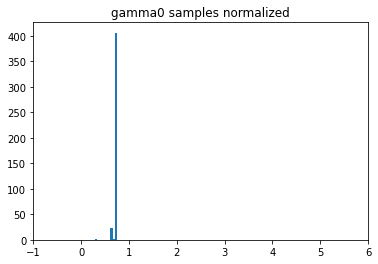

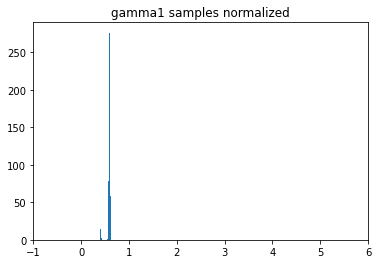

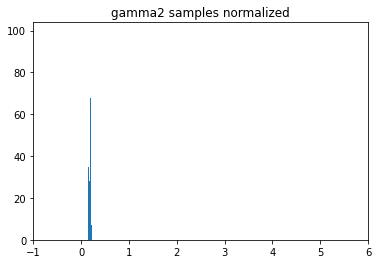

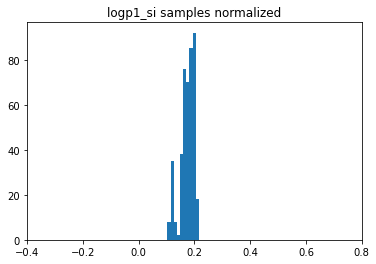

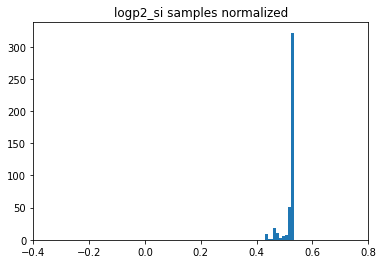

In [52]:
plt.hist(new_predictions[0])
plt.title("gamma0 samples normalized")
#print(np.min(new_predictions[0]))
#print(np.max(new_predictions[0]))
plt.xlim(-1, 6)
plt.show()

plt.hist(new_predictions[1])
plt.title("gamma1 samples normalized")
#print(np.min(new_predictions[1]))
#print(np.max(new_predictions[1]))
plt.xlim(-1, 6)
plt.show()

plt.hist(new_predictions[2])
plt.title("gamma2 samples normalized")
#print(np.min(new_predictions[2]))
#print(np.max(new_predictions[2]))
plt.xlim(-1, 6)
plt.show()

plt.hist(new_predictions[3])
plt.title("logp1_si samples normalized")
#print(np.min(new_predictions[3]))
#print(np.max(new_predictions[3]))
plt.xlim(-.4, .8)
plt.show()

plt.hist(new_predictions[4])
plt.title("logp2_si samples normalized")
#print(np.min(new_predictions[4]))
#print(np.max(new_predictions[4]))
plt.xlim(-.4, .8)
plt.show()

un-normalized outputs histogram

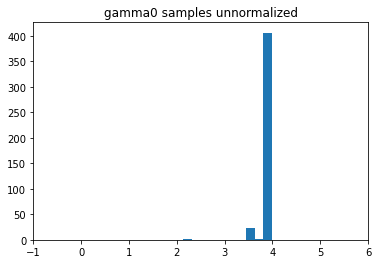

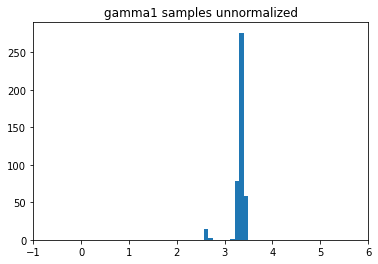

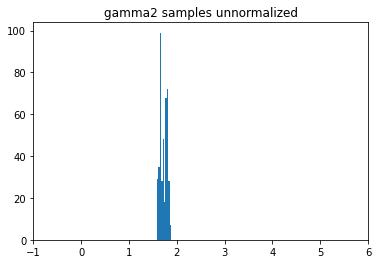

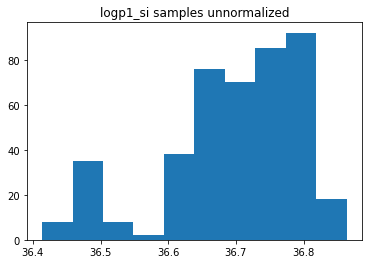

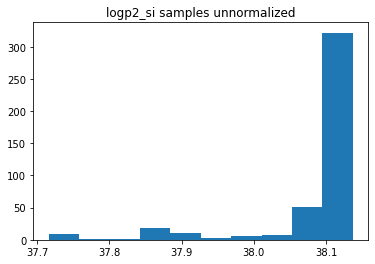

In [53]:
normgam0ar = []
for i in range (432):
    normgam0ar.append(predictions[i][0])
plt.hist(normgam0ar)
plt.title("gamma0 samples unnormalized")
plt.xlim(-1, 6)
plt.show()


normgam1ar = []
for i in range (432):
    normgam1ar.append(predictions[i][1])
plt.hist(normgam1ar)
plt.title("gamma1 samples unnormalized")
plt.xlim(-1, 6)
plt.show()


normgam2ar = []
for i in range (432):
    normgam2ar.append(predictions[i][2])
plt.hist(normgam2ar)
plt.title("gamma2 samples unnormalized")
#print(np.min(new_predictions[2]))
#print(np.max(new_predictions[2]))
plt.xlim(-1, 6)
plt.show()


normlogp1ar = []
for i in range (432):
    normlogp1ar.append(predictions[i][3])
plt.hist(normlogp1ar)
plt.title("logp1_si samples unnormalized")
#print(np.min(new_predictions[3]))
#print(np.max(new_predictions[3]))
#plt.xlim(-.4, .8)
plt.show()


normlogp2ar = []
for i in range (432):
    normlogp2ar.append(predictions[i][4])
plt.hist(normlogp2ar)
plt.title("logp2_si samples unnormalized")
#print(np.min(new_predictions[4]))
#print(np.max(new_predictions[4]))
#plt.xlim(-.4, .8)
plt.show()

# Plot one EOS

In [54]:
fgam0 = float(predictions[0][0])
fgam1 = float(predictions[0][1])
fgam2 = float(predictions[0][2])
flogp1 = float(predictions[0][3])
flogp2 = float(predictions[0][4]) 

In [55]:
oneEOS = lal.SimNeutronStarEOS3PieceDynamicPolytrope(fgam0, flogp1, fgam1, flogp2, fgam2)

XLAL Error - XLALSimNeutronStarEOSDynamicAnalytic (/home/conda/feedstock_root/build_artifacts/lalsimulation-split_1683202247538/work/lib/LALSimNeutronStarEOSDynamicPolytrope.c:102): Highest p is set larger than 9.829055e-08, the limit at which EOS is generated

XLAL Error - XLALSimNeutronStarEOSDynamicAnalytic (/home/conda/feedstock_root/build_artifacts/lalsimulation-split_1683202247538/work/lib/LALSimNeutronStarEOSDynamicPolytrope.c:102): Invalid argument


RuntimeError: Invalid argument

In [46]:
act_hmin = 0.01
act_hmax = lal.SimNeutronStarEOSMaxPseudoEnthalpy(oneEOS)

act_loghmin = np.log10(act_hmin)
act_loghmax = np.log10(act_hmax)

act_h_array = np.linspace(act_loghmin,act_loghmax,1000)

act_density = []
act_pressure = []

for h in act_h_array:
    act_density.append(lal.SimNeutronStarEOSRestMassDensityOfPseudoEnthalpy(10**h,oneEOS))
    act_pressure.append(lal.SimNeutronStarEOSPressureOfPseudoEnthalpy(10**h,oneEOS))
    
    
act_density = np.array(act_density)
act_pressure = np.array(act_pressure)

#cgs units
act_density_cgs = act_density * 1e-3
act_pressure_cgs = act_pressure * 10

act_logdensity = np.log10(act_density_cgs)
act_logpressure = np.log10(act_pressure_cgs)

NameError: name 'oneEOS' is not defined

In [47]:
plt.plot(act_logdensity,act_logpressure,marker = 'o')
plt.xlabel("mass density")
plt.ylabel("pressure")
#plt.xlim([14,15.4])
#plt.ylim([32,37])

NameError: name 'act_logdensity' is not defined

# EOS


In [44]:
#length = len(predictions)

length = 432

Progress : 0 / 432, 0.00%
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
f

XLAL Error - XLALSimNeutronStarEOSDynamicAnalytic (/home/conda/feedstock_root/build_artifacts/lalsimulation-split_1683202247538/work/lib/LALSimNeutronStarEOSDynamicPolytrope.c:102): Highest p is set larger than 9.829055e-08, the limit at which EOS is generated

XLAL Error - XLALSimNeutronStarEOSDynamicAnalytic (/home/conda/feedstock_root/build_artifacts/lalsimulation-split_1683202247538/work/lib/LALSimNeutronStarEOSDynamicPolytrope.c:102): Invalid argument
XLAL Error - XLALSimNeutronStarEOSDynamicAnalytic (/home/conda/feedstock_root/build_artifacts/lalsimulation-split_1683202247538/work/lib/LALSimNeutronStarEOSDynamicPolytrope.c:102): Highest p is set larger than 9.829055e-08, the limit at which EOS is generated

XLAL Error - XLALSimNeutronStarEOSDynamicAnalytic (/home/conda/feedstock_root/build_artifacts/lalsimulation-split_1683202247538/work/lib/LALSimNeutronStarEOSDynamicPolytrope.c:102): Invalid argument
XLAL Error - XLALSimNeutronStarEOSDynamicAnalytic (/home/conda/feedstock_root/

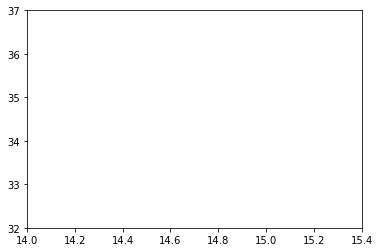

In [45]:
hlow_0 = 0.022460530117115313
hlow_1 = 0.024210313916473953
hlow = np.linspace(hlow_0,hlow_1,10,endpoint=False)
for i in range(length):
    try: 
        g0 = float(predictions[i][0])
        g1 = float(predictions[i][1])
        g2 = float(predictions[i][2])
        p1 = float(predictions[i][3])
        p2 = float(predictions[i][4])

        if i%500==0:
            print('Progress : %d / %d, %0.2f%%'%(i,length,float(i/length*100)))
        pdat = []
        rdat = []
        #eos = lal.SimNeutronStarEOS3PieceDynamicPolytrope(g0[i],p1[i]-1,g1[i],p2[i]-1,g2[i])
        eos = lal.SimNeutronStarEOS3PieceDynamicPolytrope(g0,p1,g1,p2,g2)
        hmax = lal.SimNeutronStarEOSMaxPseudoEnthalpy(eos)
        hhigh = 10**np.linspace(np.log10(hlow_1),np.log10(hmax-.0001),100)
        hdat = np.concatenate([hlow,hhigh])
        for h in hdat:
            pdat.append(lal.SimNeutronStarEOSPressureOfPseudoEnthalpy(h,eos)*10)
            rdat.append(lal.SimNeutronStarEOSRestMassDensityOfPseudoEnthalpy(h,eos)*.001)
        #plt.plot(np.log10(rdat),np.log10(pdat),'o',alpha=0.15)
        plt.plot(np.log10(rdat),np.log10(pdat),color='purple',alpha=0.15)
        
    except:
        print("failed")
        
plt.xlim([14,15.4])
plt.ylim([32,37])
plt.show()

# Actual Values EOS

In [58]:
gamma0 = np.loadtxt("eos_polytrope_gamma_0.dat.txt", dtype=float)
gamma1 = np.loadtxt("eos_polytrope_gamma_1.dat.txt", dtype=float)
gamma2 = np.loadtxt("eos_polytrope_gamma_2.dat.txt", dtype=float)
l1 = np.loadtxt('lambda_1.dat.txt', dtype=float)
l2 = np.loadtxt('lambda_2.dat.txt', dtype=float)
logp1_cgs = np.loadtxt("eos_polytrope_log_pressure_1.dat.txt", dtype=float)
logp2_cgs = np.loadtxt("eos_polytrope_log_pressure_2.dat.txt", dtype=float)
m1 = np.loadtxt("mass_1_source.dat.txt", dtype=float)
m2 = np.loadtxt("mass_2_source.dat.txt", dtype=float)

logp1_s = logp1_cgs - 1
logp2_s = logp2_cgs - 1

#length = len(gamma0)
length = 500

Progress : 0 / 500, 0.00%
Progress : 10 / 500, 2.00%
Progress : 20 / 500, 4.00%
Progress : 30 / 500, 6.00%
Progress : 40 / 500, 8.00%
Progress : 50 / 500, 10.00%
Progress : 60 / 500, 12.00%
Progress : 70 / 500, 14.00%
Progress : 80 / 500, 16.00%
Progress : 90 / 500, 18.00%
Progress : 100 / 500, 20.00%
Progress : 110 / 500, 22.00%
Progress : 120 / 500, 24.00%
Progress : 130 / 500, 26.00%
Progress : 140 / 500, 28.00%
Progress : 150 / 500, 30.00%
Progress : 160 / 500, 32.00%
Progress : 170 / 500, 34.00%
Progress : 180 / 500, 36.00%
Progress : 190 / 500, 38.00%
Progress : 200 / 500, 40.00%
Progress : 210 / 500, 42.00%
Progress : 220 / 500, 44.00%
Progress : 230 / 500, 46.00%
Progress : 240 / 500, 48.00%
Progress : 250 / 500, 50.00%
Progress : 260 / 500, 52.00%
Progress : 270 / 500, 54.00%
Progress : 280 / 500, 56.00%
Progress : 290 / 500, 58.00%
Progress : 300 / 500, 60.00%
Progress : 310 / 500, 62.00%
Progress : 320 / 500, 64.00%
Progress : 330 / 500, 66.00%
Progress : 340 / 500, 68.00%
P

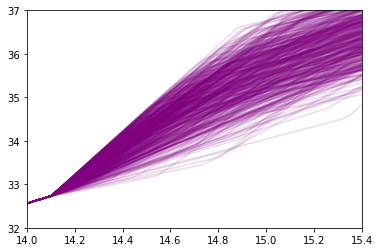

In [59]:
hlow_0 = 0.022460530117115313
hlow_1 = 0.024210313916473953
hlow = np.linspace(hlow_0,hlow_1,10,endpoint=False)
for i in range(length):

    g0 = float(gamma0[i])
    g1 = float(gamma1[i])
    g2 = float(gamma2[i])
    p1 = float(logp1_s[i])
    p2 = float(logp2_s[i])
    
    if i%10==0:
        print('Progress : %d / %d, %0.2f%%'%(i,length,float(i/length*100)))
    pdat = []
    rdat = []
    #eos = lal.SimNeutronStarEOS3PieceDynamicPolytrope(g0[i],p1[i]-1,g1[i],p2[i]-1,g2[i])
    eos = lal.SimNeutronStarEOS3PieceDynamicPolytrope(g0,p1,g1,p2,g2)
    hmax = lal.SimNeutronStarEOSMaxPseudoEnthalpy(eos)
    hhigh = 10**np.linspace(np.log10(hlow_1),np.log10(hmax-.0001),100)
    hdat = np.concatenate([hlow,hhigh])
    for h in hdat:
        pdat.append(lal.SimNeutronStarEOSPressureOfPseudoEnthalpy(h,eos)*10)
        rdat.append(lal.SimNeutronStarEOSRestMassDensityOfPseudoEnthalpy(h,eos)*.001)
    #plt.plot(np.log10(rdat),np.log10(pdat),'o',alpha=0.15)
    plt.plot(np.log10(rdat),np.log10(pdat),color='purple',alpha=0.15)
plt.xlim([14,15.4])
plt.ylim([32,37])
plt.show()

# Loss

In [185]:
history.history.keys() 

dict_keys(['loss', 'gamma0_output_loss', 'gamma1_output_loss', 'gamma2_output_loss', 'logp1_si_output_loss', 'logp2_si_output_loss', 'gamma0_output_mean_squared_error', 'gamma1_output_mean_squared_error', 'gamma2_output_mean_squared_error', 'logp1_si_output_mean_squared_error', 'logp2_si_output_mean_squared_error', 'val_loss', 'val_gamma0_output_loss', 'val_gamma1_output_loss', 'val_gamma2_output_loss', 'val_logp1_si_output_loss', 'val_logp2_si_output_loss', 'val_gamma0_output_mean_squared_error', 'val_gamma1_output_mean_squared_error', 'val_gamma2_output_mean_squared_error', 'val_logp1_si_output_mean_squared_error', 'val_logp2_si_output_mean_squared_error'])

ValueError: x and y must have same first dimension, but have shapes (63,) and (78,)

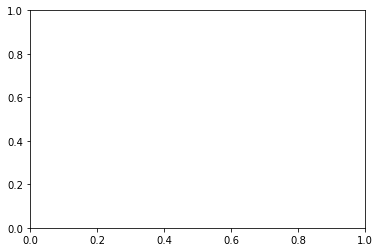

In [186]:
#loss for gamma0 values
loss_train = history.history['gamma0_output_loss']
loss_val = history.history['val_gamma0_output_loss']
epochs = range(0,63)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma0')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#loss for gamma1 values
loss_train = history.history['gamma1_output_loss']
loss_val = history.history['val_gamma1_output_loss']
epochs = range(0,63)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#loss for gamma2 values
loss_train = history.history['gamma2_output_loss']
loss_val = history.history['val_gamma2_output_loss']
epochs = range(0,63)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for gamma2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#loss for logp1_si values
loss_train = history.history['logp1_si_output_loss']
loss_val = history.history['val_logp1_si_output_loss']
epochs = range(0,63)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for logp1_si')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#loss for logp2_si values
loss_train = history.history['logp2_si_output_loss']
loss_val = history.history['val_logp2_si_output_loss']
epochs = range(0,63)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for logp2_si')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()